In [3]:
from ase.io import read,write
import numpy as np
import matplotlib.pyplot as plt


In [4]:
structures = read("./mos2_interlayer_dset.xyz",index=":")
moire = read("591-6.01_deg-546_atoms.xsf",format="xsf")
structures[0].info

{'energy': 4.24654135394303,
 'il_dist': 2.1000000000000014,
 'lateral_dist_x': 0.0,
 'lateral_dist_y': 0.0,
 'cbm': 0.3163999999999998,
 'vbm': -0.0029000000000003467,
 'efermi': 2.3812,
 'bandgap': 0.31930000000000014,
 'bandgap_rel': -1.4975999999999998,
 'lj_energy': 0}

3.349609115233127
[0. 0.]
[ 3.35772338 -1.71051335]
[ 6.71544675 -3.42102669]
[10.07317013 -5.13154004]
[13.4308935  -6.84205338]
[16.78861688 -8.55256673]
[ 20.14634025 -10.26308008]
[ 23.50406363 -11.97359342]
[-0.19751368  3.76313042]
[3.1602097  2.05261707]
[6.51793307 0.34210372]
[ 9.87565645 -1.36840962]
[13.23337983 -3.07892297]
[16.5911032  -4.78943631]
[19.94882658 -6.49994966]
[23.30654995 -8.21046301]
[-0.39502735  7.52626083]
[2.96269602 5.81574748]
[6.3204194  4.10523414]
[9.67814277 2.39472079]
[13.03586615  0.68420745]
[16.39358953 -1.0263059 ]
[19.7513129  -2.73681925]
[23.10903628 -4.44733259]
[-0.59254103 11.28939125]
[2.76518235 9.5788779 ]
[6.12290572 7.86836455]
[9.4806291  6.15785121]
[12.83835247  4.44733786]
[16.19607585  2.73682452]
[19.55379922  1.02631117]
[22.9115226  -0.68420218]
[-0.79005471 15.05252166]
[ 2.56766867 13.34200832]
[ 5.92539204 11.63149497]
[9.28311542 9.92098162]
[12.6408388   8.21046828]
[15.99856217  6.49995493]
[19.35628555  4.78944159]


(-3.0022042352506038,
 28.28388182749549,
 -15.873564272318026,
 32.29450082706008)

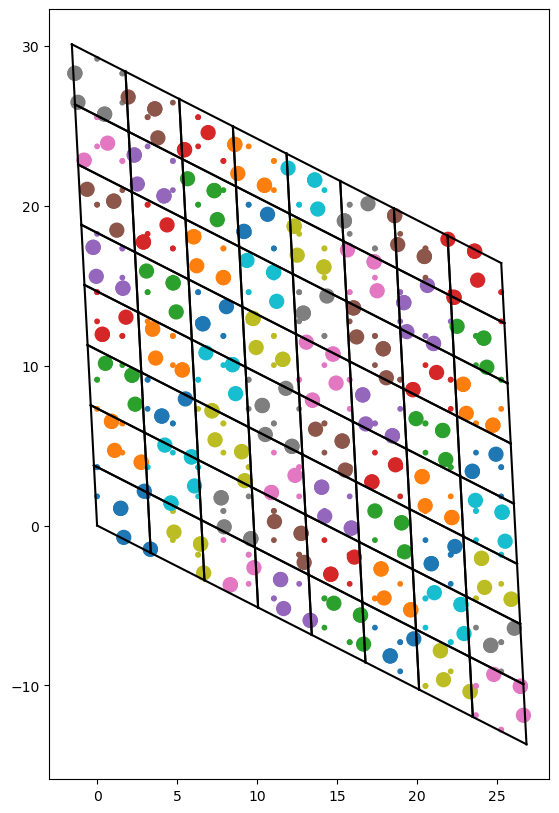

In [64]:
def create_grid(moire_atoms, n):
    """
    Subdivide the moiré cell into an n x n grid.
    
    Parameters:
    - cell_size: The size of the moiré cell.
    - n: The number of subdivisions along one axis.
    
    Returns:
    - A 2D array representing the grid points.
    """
    x = np.linspace(0, 1, n+1)
    y = np.linspace(0, 1, n+1)
    grid = np.meshgrid(x, y)

    moire_grid_atoms = []
    for i in range(n):
        grid_atoms_row = []
        for j in range(n):
            m1 = moire_atoms[np.logical_and(moire_atoms.get_scaled_positions()[:,0] < x[i+1], moire_atoms.get_scaled_positions()[:,0] > x[i] ) ]
            m1 = m1[np.logical_and(m1.get_scaled_positions()[:,1] < y[j+1], m1.get_scaled_positions()[:,1] > y[j] ) ]
            grid_atoms_row.append(m1)
        moire_grid_atoms.append(grid_atoms_row)


    return grid,moire_grid_atoms

n = 8
moire_grid,moire_grid_atoms = create_grid(moire,n)
moire_grid_atoms[0][0]
plt.figure(figsize=(10,10))
# plt.scatter(moire.get_positions()[:,0],moire.get_positions()[:,1])
for i in range(n):
    for j in range(n):
        plt.scatter(moire_grid_atoms[i][j].get_positions()[:,0],
                    moire_grid_atoms[i][j].get_positions()[:,1], 
                    s = np.where(moire_grid_atoms[i][j].positions[:,2] > moire_grid_atoms[i][j].positions[:,2].mean() , 100, 10))

# Additional code to plot black line outlines around grid cells
n = len(moire_grid[0])  # Number of divisions in one axis, assuming a square grid
cell_size = np.linalg.norm(moire.cell[0])/n  # Assuming uniform cell size
print(cell_size)
for i in range(n-1):
    for j in range(n-1):
        x0 = moire_grid[0][i, j] 
        y0 = moire_grid[1][i, j] 

        p1 = np.array([moire_grid[0][i, j], moire_grid[1][i, j]]) @ moire.cell[:2,:2]
        print(p1)
        p2 = np.array([moire_grid[0][i+1, j], moire_grid[1][i+1, j] ]) @ moire.cell[:2,:2]
        p3 = np.array([moire_grid[0][i+1, j+1], moire_grid[1][i+1, j+1]]) @ moire.cell[:2,:2]
        p4 = np.array([moire_grid[0][i, j+1], moire_grid[1][i, j+1]]) @ moire.cell[:2,:2]
        # print(x0,y0)
        # Draw lines around each grid cell
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black') # Bottom edge
        plt.plot([p2[0], p3[0]], [p2[1], p3[1]], color='black') # Right edge
        plt.plot([p3[0], p4[0]], [p3[1], p4[1]], color='black') # Top edge
        plt.plot([p4[0], p1[0]], [p4[1], p1[1]], color='black') # Left edge

plt.axis('scaled')

In [ ]:
def find_closest_match(grid_cell, database):
    """
    Find the closest matching atomic configuration in the database for the given grid cell.
    
    Parameters:
    - grid_cell: The atomic positions in the current grid cell.
    - database: A data structure holding atomic configurations and their energy values.
    
    Returns:
    - The energy value of the closest matching configuration.
    """
    # Logic to compare `grid_cell` with entries in `database` and find the closest match
    # This is highly dependent on the structure of your database and the data format
    closest_match_energy = ...  # Placeholder for actual logic
    return closest_match_energy

In [ ]:
def assign_energy_values(grid, database):
    """
    Assign energy values to each grid cell based on the closest match in the database.
    
    Parameters:
    - grid: The 2D array of grid points.
    - database: The database of atomic configurations and energy values.
    
    Returns:
    - A 2D array of energy values for each grid cell.
    """
    energy_grid = np.zeros_like(grid[0])  # Assuming grid[0] and grid[1] have the same shape
    for i in range(grid[0].shape[0]):
        for j in range(grid[0].shape[1]):
            grid_cell = ...  # Extract atomic positions for the grid cell at (i, j)
            energy_grid[i, j] = find_closest_match(grid_cell, database)
    return energy_grid

In [ ]:
from numpy.fft import fft2

def apply_fourier_transform(energy_grid):
    """
    Apply a Fourier transform to the grid of energy values.
    
    Parameters:
    - energy_grid: A 2D array of energy values for each grid cell.
    
    Returns:
    - The Fourier transform of the energy grid.
    """
    fourier_transform = fft2(energy_grid)
    return fourier_transform